<a href="https://colab.research.google.com/github/AlixMaufrais/airbnb_price_analysis/blob/main/Airbnb_Price_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

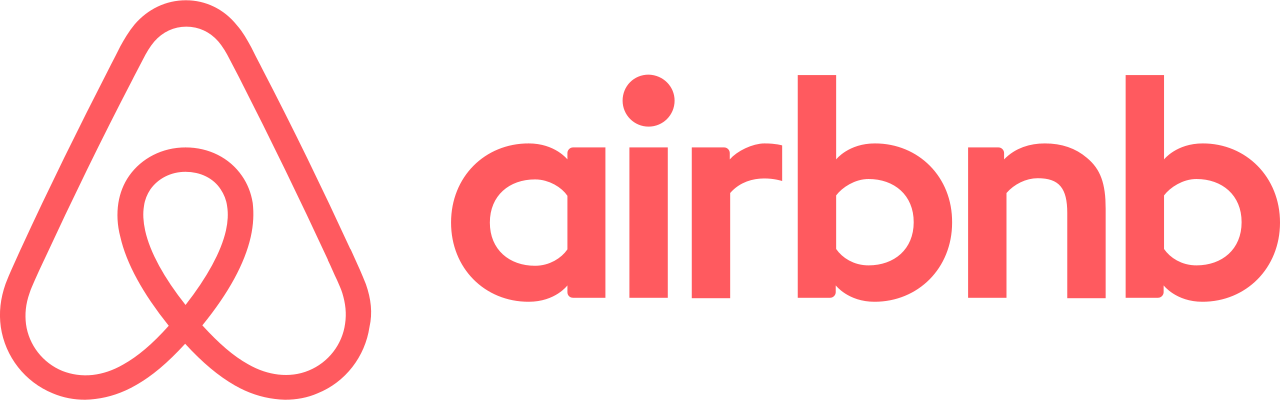

# Data Description

Data collected on the Airbnb website on September 9, 2022.

Detailed description:
- **calendar**: Table gathering reservation calendar information. Contains prices and availability for coming year.
    - *listing_id*: id of the accommodation
    - *date*: day of possible reservation
    - *available*: availability/unavailability of the accommodation
    - *price*: price according to the day
- **listing**: Table with an overview of the accommodations.
    - *id* : Airbnb's unique identifier for the listing (accomodation)
    - *host_response_time* : The average response time of the host for this accommodation
    - *room_type* : Entire home/apt | Private room | Shared room
    - *review_scores_value* : The average reviews score that the listing has

# 1) Import of data

The files can be downloaded in csv format via these links:


*   [listing](https://drive.google.com/file/d/19MV9XLOYDld3fw79PzIseX3wEmK5P2vD/view?usp=sharing)
*   [calendar](https://drive.google.com/file/d/1w9SWUrRblQhxaa1hkwvQHE943at1iZM5/view?usp=sharing)



Then import I them into my Google Colab environment to start working with

In [ ]:
import pandas as pd

Load the files "calendar.csv" into a `calendar` variable

In [ ]:
calendar = pd.read_csv("calendar.csv")

Displays the first 10 elements of `calendar`

In [ ]:
calendar.head(10)

,listing_id,date,available,price
0,130420,2022-09-10,f,$220.00
1,130420,2022-09-11,f,$210.00
2,130420,2022-09-12,t,$210.00
3,130420,2022-09-13,t,$210.00
4,130420,2022-09-14,t,$210.00
5,130420,2022-09-15,f,$210.00
6,130420,2022-09-16,f,$220.00
7,130420,2022-09-17,f,$220.00
8,130420,2022-09-18,f,$210.00
9,130420,2022-09-19,f,$210.00


Load the file "listing.csv" into a `listing` variable

In [ ]:
listing = pd.read_csv("listing.csv")

Displays the first 10 elements of `listing`

In [ ]:
listing.head(10)

,id,room_type,host_response_time,review_scores_value
0,130420,Entire home/apt,within a few hours,4.43
1,23441,Entire home/apt,within a day,4.64
2,5396,Entire home/apt,within an hour,4.54
3,7397,Entire home/apt,within an hour,4.72
4,24260,Entire home/apt,within a few hours,4.64
5,137112,Entire home/apt,within an hour,4.61
6,26562,Entire home/apt,within a day,4.98
7,137857,Entire home/apt,within an hour,4.55
8,138548,Entire home/apt,within a few hours,4.79
9,139074,Entire home/apt,within a day,4.85


# 2) Cleaning and formatting

## Date

For the `calendar` dataset, the "date" column is formatted as a "string".

Using the `to_datetime` function, transforms the "date" column to datetime format

In [ ]:
calendar["date"] = pd.to_datetime(calendar["date"], format='%Y-%m-%d')

Create a new column "month" in `calendar` that corresponds to the month of the year.

Use `dt.month` to extract the month from a datetime

In [ ]:
calendar["month"] = calendar["date"].dt.month

## Price

In `calendar`, the "price" column is in a particular format :
```
$13,700.00
```
I will try to transform them into `Float` type.

Let's start with a little exercise :

Put the thongs below in the right format.

In [ ]:
price_1 = "$200.00"
price_2 = "$13,700.00"

price_1 = float(price_1.replace("$",""))
price_2 = float(price_2.replace("$","").replace(",",""))

In [ ]:
price_1

200.0

In [ ]:
price_2

13700.0

Create a function `clean_price`, which takes as input a variable "price" in the format seen above, and returns the price in float format.

In [ ]:
def clean_price(price):
  price = float(price.replace("$","").replace(",",""))
  return price

In `calendar`, set  the "price" column in the right format.

In [ ]:
calendar["price"] = calendar["price"].apply(clean_price)

In [ ]:
calendar

,listing_id,date,available,price,month
0,130420,2022-09-10,f,220.0,9
1,130420,2022-09-11,f,210.0,9
2,130420,2022-09-12,t,210.0,9
3,130420,2022-09-13,t,210.0,9
4,130420,2022-09-14,t,210.0,9
...,...,...,...,...,...
72096,753084,2023-01-27,f,100.0,1
72097,753084,2023-01-28,f,100.0,1
72098,753084,2023-01-29,f,100.0,1
72099,753084,2023-01-30,f,100.0,1


# 3) Data exploration

The objective of this part is to discover the data you have available.

The graphics will be made with this library :

In [ ]:
import plotly.express as px

For `calendar` : **display the oldest and the most recent reservation date**.

In [ ]:
print("The oldest reservation date is:", calendar["date"].min())
print("The most recent reservation date is:", calendar["date"].max())

The oldest reservation date is: 2022-09-09 00:00:00
The most recent reservation date is: 2023-01-31 00:00:00


For `calendar` : **display the number of unique "listing_id"**

In [ ]:
calendar["listing_id"].nunique()

500

For `calendar` : **display the descriptive statistics of price column (mean, standard deviation etc...)**

In [ ]:
calendar["price"].describe()

count    72101.000000
mean       158.020041
std        142.359070
min         30.000000
25%         85.000000
50%        120.000000
75%        175.000000
max       4000.000000
Name: price, dtype: float64

For `calendar`: **display the percentage of days an accommodation is available on average**.

In [ ]:
mask_available_true = calendar["available"] == "t"

calendar[mask_available_true].shape[0] / calendar["available"].shape[0]

0.2432143798282964

For `listing`: **Display the number of accommodations by room_type as a bar graph**

In [ ]:
fig_nb_accommodations = px.bar(listing, x=listing["id"].value_counts(), y="room_type", title="Number of accommodations by room type", labels={"x":"number of accommodations"})
fig_nb_accommodations.show()

# 4) Is the average review score different between "entire home" and "private room" properties? Is it significant?

To answer this question, I propose to perform a z-test.

**Why can we do this test? Why not perform a t-test?**

We can do a z-test because the room type ("entire home" and "private room") is a categorical variable and the review score is a continuous variable. Moreover, the z-test and the t-test determine if two samples' means are different but we can perform a t-test only if the sample size is less than 30. Here the sample size is more than 30 so we should perform a z-test.

In [ ]:
from statsmodels.stats.weightstats import ztest

With the variable `listing`, I will create two Dataframe:

*   `home` : listing with `room_type` "Entire home/apt"
*   `private_room` : listing with `room_type` "Private room"

In [ ]:
mask_home = (listing["room_type"] == "Entire home/apt")
home = listing[mask_home]
home.head()

,id,room_type,host_response_time,review_scores_value
0,130420,Entire home/apt,within a few hours,4.43
1,23441,Entire home/apt,within a day,4.64
2,5396,Entire home/apt,within an hour,4.54
3,7397,Entire home/apt,within an hour,4.72
4,24260,Entire home/apt,within a few hours,4.64


In [ ]:
mask_private = (listing["room_type"] == "Private room")
private_room = listing[mask_private]
private_room.head()

,id,room_type,host_response_time,review_scores_value
13,31435,Private room,within an hour,4.45
24,38303,Private room,within an hour,4.77
25,11213,Private room,within a few hours,4.55
34,39948,Private room,within a day,4.81
38,163384,Private room,within a few hours,4.64


Calculate and display the p-value to answer the problem. I will use the `ztest` function.

In [ ]:
zScore, pValue = ztest(home["review_scores_value"], private_room["review_scores_value"])
print(f'p-value: {pValue}')

p-value: 0.047917748274801955


**Taking a threshold at 5%, answer the problem.**

We notice that : p-value < 5%.
Our hypothesis h0 to answer the question is : "There is no difference".
So we can reject the null hypothesis.
We conclude that there is a difference, the average review score is different between "entire home" and "private room" properties.

# 5) Does a host's response time affect its final review score?

Airbnb doesn't like it much when hosts take time to respond. It's a real loss of revenue. <br>
I wonder if a host's response time affects the final rating they receive from their guests.

With `listing` : **calculate the proportion of accommodations that have a host with the longest response time, i.e. "a few days or more "**.

In [ ]:
mask_longest_response = listing["host_response_time"] == "a few days or more"

listing[mask_longest_response].shape[0] / listing["host_response_time"].shape[0]

0.044

I propose to calculate the correlation between `host_response_time` and `review_scores_value`, to see if the two variables are correlated. <br>
First, **create a new column "host_response_time_num", which contains the value of host_response_time in numerical values** with the following rule:

*   1 : within an hour
*   2 : within a few hours
*   3 : within a day
*   4 : a few days or more

In [ ]:
listing["host_response_time_num"] = listing["host_response_time"].replace({"within an hour":1, "within a few hours":2, "within a day":3, "a few days or more":4})
listing["host_response_time_num"]

0      2
1      3
2      1
3      1
4      2
      ..
495    1
496    1
497    1
498    2
499    2
Name: host_response_time_num, Length: 500, dtype: int64

**Calculate the correlation between `host_response_time` and `review_scores_value`.**

In [ ]:
listing["host_response_time_num"].corr(listing["review_scores_value"])

-0.18039981452312104

**Create box plot to represent the two variables.**

In [ ]:
fig_box_time_review = px.box(listing, x="host_response_time_num", y="review_scores_value", title="Host response time and review score")
fig_box_time_review.show()

**Conclusion: does the response time of a host influence the final score he will receive from his customers?**

There is a negative correlation between the response time and the review score. Moreover, as we can see on the last graphic, there is only a significant difference for the host response time number 4, which corresponds to the "a few days or more" time answer.
So we can conclude that the response time of a host influence the final score only if he takes a few days or more time to answer.

# 6) Pricing trend analysis: are hosting companies taking advantage of the calendar to set their prices?

I wonder if hosts take advantage of the calendar to set their prices. For example higher rates during national holidays.

I assume that Airbnb hosts set their own prices.

For `calendar` : **put the "date" column in index**

In [ ]:
calendar = calendar.set_index("date")
calendar.head()

,listing_id,available,price,month
date,,,,
2022-09-10,130420,f,220.0,9
2022-09-11,130420,f,210.0,9
2022-09-12,130420,t,210.0,9
2022-09-13,130420,t,210.0,9
2022-09-14,130420,t,210.0,9


With the `resample` function, **calculate the average price per day**.

The result will be stored in a `mean_price` variable

In [ ]:
mean_price = calendar.resample("D")["price"].mean()
mean_price

date
2022-09-09    153.445545
2022-09-10    157.982000
2022-09-11    155.676000
2022-09-12    155.840000
2022-09-13    155.802000
                 ...    
2023-01-27    162.688000
2023-01-28    163.012000
2023-01-29    159.994000
2023-01-30    156.910000
2023-01-31    156.942000
Freq: D, Name: price, Length: 145, dtype: float64

**Display graphically the evolution of the average daily price**

In [ ]:
fig_daily_price_evo = px.line(mean_price, title="Evolution of the average daily price")
fig_daily_price_evo.show()

**How does the average daily price evolve during the Christmas holidays?**

During the Chrismas holidays, the average daily price increases significantly.

**Calculate and display the percentage of properties that never change the price of their home.**

This can be done by calculating the standard deviation of prices using the function `std`

In [ ]:
std_price = pd.DataFrame(calendar.groupby(["listing_id"])["price"].std())
std_price

,price
listing_id,
5396,14.869320
7397,4.420936
9952,0.000000
10586,0.000000
10588,0.000000
...,...
784863,0.000000
786347,16.272137
786714,13.446490


In [ ]:
mask_null_std = (std_price["price"] == 0)
std_price[mask_null_std].shape[0] / std_price["price"].shape[0]

0.47

**Using the previous questions, do you think hosts take advantage of the calendar to set their prices?**

As we can see, the average daily price increases significantly during Chrismas holidays and there is only 47% of properties that never change the price of their home. So yes, I think hosts take advantage of the calendar to set their prices.